A Analogia:
- Qubit 0: Será nosso Interruptor.
- Qubit 1: Será nossa Lâmpada.
- Estado |0⟩: Significa "Desligado".
- Estado |1⟩: Significa "Ligado".
- A Porta CNOT (CX): Será a "fiação" que conecta o interruptor à lâmpada. A regra é simples: se o interruptor (controle) estiver ligado, então a lâmpada (alvo) inverte seu estado.


In [4]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

Cenário 1: Interruptor Desligado


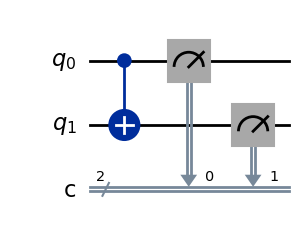

In [5]:
qc_off = QuantumCircuit(2, 2)

# Os qubits já começam em |00⟩, então o interruptor está DESLIGADO.

# Adicionamos a fiação (a porta CNOT)
# q0 é o controle (interruptor), q1 é o alvo (lâmpada)
qc_off.cx(0, 1)

# Adicionamos a medição para ver o resultado
qc_off.measure([0, 1], [0, 1])

# Vamos visualizar o circuito
print("Cenário 1: Interruptor Desligado")
display(qc_off.draw('mpl'))

 A porta CNOT inverte o estado do qubit alvo (`q₁`) **se, e somente se,** o qubit de controle (`q₀`) estiver no estado `|1⟩`.


Resultado com o interruptor desligado:


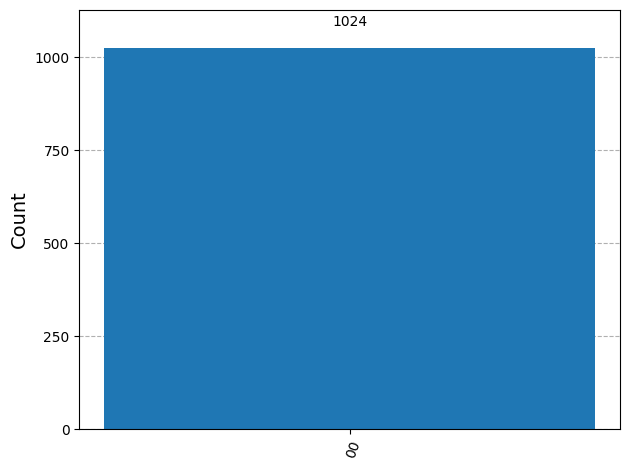

In [6]:
# Executando no simulador
simulator = AerSimulator()
job = simulator.run(qc_off, shots=1024)
counts = job.result().get_counts()

print("\nResultado com o interruptor desligado:")
plot_histogram(counts)


Cenário 2: Interruptor Ligado


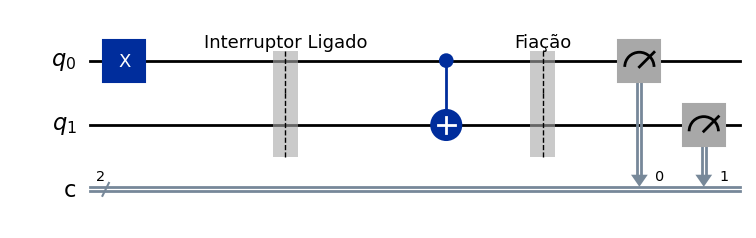

In [7]:
qc_on = QuantumCircuit(2, 2)

# PASSO 1: Ligar o interruptor (qubit 0)
qc_on.x(0)
qc_on.barrier(label="Interruptor Ligado")

# PASSO 2: Adicionar a fiação (a porta CNOT)
qc_on.cx(0, 1)
qc_on.barrier(label="Fiação")

# PASSO 3: Medir o resultado final
qc_on.measure([0, 1], [0, 1])

# Vamos visualizar o circuito completo
print("\nCenário 2: Interruptor Ligado")
display(qc_on.draw('mpl'))


Resultado com o interruptor ligado:


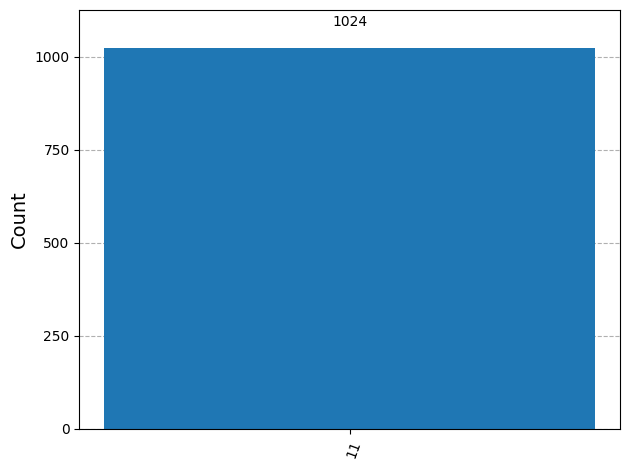

In [8]:
# Executando o segundo circuito
job_on = simulator.run(qc_on, shots=1024)
counts_on = job_on.result().get_counts()

print("\nResultado com o interruptor ligado:")
plot_histogram(counts_on)